In [3]:
import itertools
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc, roc_auc_score,classification_report
import torch
import torchaudio
from torch import nn
import numpy as np 
from torch.utils.data import DataLoader
import pandas as pd
from LangaeDataset import Language_detection
from sklearn.decomposition import PCA
# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
from xgboost.sklearn import XGBClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt # Import Matplotlib
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [4]:
def eva(y_test,y_pred):
    print(accuracy_score(y_test, y_pred))
    # print('ROC-AUC score', roc_auc_score(y_test,y_pred))
    print('Confusion matrix:\n ', confusion_matrix(y_test, y_pred))
    print('classification report:\n ',classification_report(y_test, y_pred))


def divse():
        if torch.cuda.is_available():
            device = "cuda"
        else:
            device = "cpu"
        print(f"Using device {device}")
        return device

In [17]:

BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 0.001
DATASET_PATH = r"D:\IAMS_GP\Samples\Smaple"
DATASET_INFO_PATH =r"D:\New_SampledData.csv"
samplerate=8000
num_samples=8000*8

In [18]:
def preparing_data(ld):
    data= pd.DataFrame()
    X=[]
    Y=[]
    c=0
    for x,y in ld:
        X.append(x)
        Y.append(y)
        c+=1
        if c>=len(ld):break 
   
    data=np.array(X)
    return data,Y

In [19]:
def encode(data):
    all_feuter=[]
    labels=[]
    c=0
    for mffc,Y in data:
        mffc = mffc.contiguous().view(mffc.size(0), -1)
        all_feuter.append(*model(mffc).detach().numpy())
        labels.append(Y)
        c+=1

        if c>=len(data):break 
    return np.array(all_feuter), np.array(labels)


In [20]:
def meanvartrans(data,n):
    all_feuter=[]
    for mffc in data:
        stddev_mfccs = np.std(mffc.T, axis=0)

        mean_mfccs = np.mean(mffc.T, axis=0)
        sum=[]

        average_difference = np.zeros((n,))
        for i in range(0, len(mffc.T) - 2, 2):
            sum.append(mffc.T[i] - mffc.T[i+1])
        average_difference=np.sum(sum)
        average_difference = np.array(average_difference)
        
        z=[*stddev_mfccs,*mean_mfccs,average_difference]

        
        all_feuter.append(z)
    return np.array(all_feuter)


In [21]:
def meanvartrans2(data):
    all_feuter=[]
    for mffc in data:
        stddev_mfccs = np.std(mffc, axis=0)

        mean_mfccs = np.mean(mffc, axis=0)
        sum=[]

        average_difference = np.zeros((13,))
        for i in range(0, len(mffc.T) - 2, 2):
            sum.append(mffc.T[i] - mffc.T[i+1])
        average_difference=np.sum(sum)
        average_difference = np.array(average_difference)
        
        z=[*stddev_mfccs,*mean_mfccs,average_difference]

        
        all_feuter.append(z)
    return np.array(all_feuter)


In [22]:
def faltten(data):
    data2=[]
    for d in data:
        
        data2.append(d.flatten())


    return np.array(data2)


In [23]:
def predect(model,X_train, y_train,X_test, y_test):
    model.fit(X_train, y_train)

    #Scoring the model on train data
    print("Training Accuracy :\t ", model.score(X_train, y_train))

    #Scoring the model on test_data
    print("Testing Accuracy :\t  ",  model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    scc=accuracy_score(y_test, y_pred)
    print(scc)
    #print('ROC-AUC score', roc_auc_score(y_test,y_pred))
    print('classification report:\n ',classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt="3g")
    plt.show()
    return y_pred,scc


In [24]:
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=samplerate,
        n_fft=1024,
        hop_length=512,
        n_mels=64
    )
mfcc=torchaudio.transforms.MFCC(sample_rate = 16000,
n_mfcc = 13)
device=divse()
ld=Language_detection(DATASET_INFO_PATH,DATASET_PATH,mel_spectrogram,divse(),samplerate,num_samples,True)
data,Y=preparing_data(ld)



C:\Users\mm\anaconda3\lib\site-packages\torchaudio\functional\functional.py:571: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Using device cpu
Using device cpu


In [25]:
ld=Language_detection(DATASET_INFO_PATH,DATASET_PATH,mfcc,divse(),samplerate,num_samples,True)
data2,Y2=preparing_data(ld)

Using device cpu


In [26]:
new_Y=pd.DataFrame(Y)
# faltten_X=pd.DataFrame(faltten(data))
meanvar_X=pd.DataFrame(meanvartrans(data2,13))
# meanvar_X2=pd.DataFrame(meanvartrans2(data))

# faltten_data=pd.concat([faltten_X,new_Y],axis=1)
# meanvar_X=pd.concat([meanvar_X,new_Y],axis=1)

C:\Users\mm\AppData\Local\Temp\ipykernel_5756\3635005534.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(all_feuter)


In [27]:
type(data)


numpy.ndarray

In [34]:
# new_Y2=pd.DataFrame(Y2)
# # faltten_X=pd.DataFrame(faltten(data))
# meanvar_X2=pd.DataFrame(meanvartrans(data2,13))
meanvar_X22=pd.DataFrame(meanvartrans2(meanvartrans(data,13)))
# meanvar_X22

C:\Users\mm\AppData\Local\Temp\ipykernel_5756\3635005534.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(all_feuter)


In [35]:
ll=pd.concat([meanvar_X,meanvar_X22],axis=1)
ll.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,0,1,2
0,[207.72263],[43.620247],[22.87939],[16.668531],[20.32405],[23.16511],[14.859827],[15.651737],[10.342537],[10.557948],...,[-11.350805],[-7.337253],[-4.710208],[1.5105289],[0.09270335],[-1.7827072],-138.44102,1087.083740,210.498383,224.370239
1,[211.96141],[34.7018],[34.08297],[23.469074],[30.760809],[16.462465],[15.265456],[13.292302],[12.41301],[8.986484],...,[-5.409456],[-5.9304237],[-4.5097704],[-4.3164144],[-8.443588],[-2.0466735],-673.32825,1137.073364,61.891846,722.335938
2,[208.63167],[31.1411],[28.08355],[20.872076],[25.962942],[14.253452],[13.095925],[10.7095175],[10.223246],[7.6698675],...,[-3.433907],[-3.7521133],[-3.3266327],[-3.0381756],[-4.332324],[-2.1293416],24.685608,4134.623535,599.852722,2862.933838
3,[184.38501],[36.268097],[31.913744],[24.878065],[37.744946],[18.056713],[12.460038],[12.048657],[10.21273],[9.881284],...,[-6.767243],[-3.066777],[-4.641789],[-9.432173],[-9.208344],[-0.482367],-485.94257,1132.058472,-48.440861,18.215027
4,[178.6996],[28.821302],[28.03972],[25.425503],[32.838627],[13.812164],[8.486566],[12.595815],[8.381176],[8.664267],...,[-6.1888723],[-1.3112562],[-2.6167982],[-6.607257],[-4.2874126],[-1.3445534],138.58752,62.949997,19.063061,196.264740


In [60]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y2=le.fit_transform(new_Y)

X_train3, X_test3, y_train3, y_test3 = train_test_split(ll, y2,
                                            stratify=y2, 
                                            test_size=0.10)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
X_test3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,0,1,2
124326,[197.43774],[36.68197],[27.504599],[19.768633],[27.65733],[13.875834],[17.557882],[11.586052],[15.656859],[7.990667],...,[-2.5081143],[-8.879649],[3.18618],[-3.3133268],[-0.41301045],[-1.1163149],-89.26929,50.698479,9.043515,16.536781
304964,[132.78552],[51.878098],[33.407143],[33.027508],[38.994976],[19.584042],[17.067581],[14.299611],[15.618937],[11.314691],...,[-10.0066805],[0.5089735],[-6.7350526],[-3.2852612],[-4.8228807],[4.5686603],-45.192894,338.175140,48.349590,-330.572754
56983,[150.00798],[36.217827],[39.10148],[25.986813],[32.19693],[15.701518],[17.805416],[12.329226],[9.850137],[9.570971],...,[-3.366818],[-4.3748713],[-4.692595],[-3.178178],[-0.34550482],[4.4574804],11.502895,1900.126099,-126.233757,421.146973
257435,[197.03375],[30.959656],[28.895187],[19.359905],[23.872158],[13.456792],[12.247336],[11.321826],[11.541312],[10.025595],...,[0.17595693],[-3.623585],[-1.2449602],[0.06957998],[3.3666255],[0.73003846],737.2619,5954.695801,-384.364105,533.454346
82628,[178.44542],[42.598446],[48.631565],[37.220055],[19.155561],[20.336554],[13.969251],[12.52653],[12.22776],[11.808174],...,[-4.061819],[-6.313581],[-5.0884266],[0.49995062],[1.8596534],[-5.020324],-245.02614,888.722534,107.065018,66.404785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182604,[170.05661],[34.32378],[29.590195],[33.59668],[29.304708],[17.535213],[13.127735],[10.017072],[8.147792],[8.5733185],...,[1.570839],[2.2060363],[3.9638715],[2.9157205],[9.273475],[9.208991],-191.59045,1474.019043,-94.319633,143.922729
132122,[222.98029],[21.928255],[16.573814],[14.557294],[15.0783825],[9.575179],[9.555551],[7.9005938],[8.208556],[6.899743],...,[-4.7529726],[-5.3819003],[-3.3315673],[-4.0107594],[-2.015056],[-2.0934744],248.26868,1509.405884,181.412201,32.237091
67045,[184.08368],[36.99622],[40.162914],[30.560652],[31.662975],[18.319916],[19.552114],[10.924017],[17.890211],[10.387691],...,[0.061988782],[-10.825454],[-2.031837],[1.5846645],[-1.6054821],[0.52864677],-95.60178,363.558685,-15.771467,-77.918503
60350,[159.96843],[36.648693],[32.43873],[34.542843],[20.670692],[18.465614],[15.135269],[11.529063],[9.663935],[8.389003],...,[-5.4913545],[-5.3693724],[-2.4552565],[-3.181196],[4.371757],[1.372616],73.79706,72.942131,10.751058,-29.642365


In [62]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
scaler = MinMaxScaler()
X_train3s=scaler.fit_transform(X_train3)
X_test3s=scaler.transform(X_test3)


MemoryError: Unable to allocate 61.6 MiB for an array with shape (27, 299244) and data type object

In [ ]:
X_train3s[:5,:]

In [ ]:

# 2. Decision Tree
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
dt_model =  DecisionTreeClassifier()
hist = HistGradientBoostingClassifier( random_state=42,)

rf_model = RandomForestClassifier( n_jobs=-1)   
ada_boost_model = AdaBoostClassifier()
bagging_model = BaggingClassifier()
extra_trees_model = ExtraTreesClassifier()

In [ ]:
#  HistGradientBoostingClassifier(loss: str = "log_loss", *, learning_rate: float = 0.1, max_iter: int = 100, max_leaf_nodes: int = 31, 
#  max_depth: Any | None = None, min_samples_leaf: int = 20, l2_regularization: float = 0, max_bins: int = 255, categorical_features: Any | None = None,
#   monotonic_cst: Any | None = None, warm_start: bool = False, early_stopping: str = "auto", scoring: str = "loss", validation_fraction: float = 0.1,
#    n_iter_no_change: int = 10, tol: float = 1e-7, verbose: int = 0, random_state: Any | None = None)

Binning 0.048 GB of training data: 0.834 s
Binning 0.012 GB of validation data: 0.022 s
Fitting gradient boosted rounds:
[1/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.35090, val score: 0.34064, in 0.359s
[2/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.37340, val score: 0.36297, in 0.355s
[3/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.38020, val score: 0.36925, in 0.365s
[4/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.38520, val score: 0.37314, in 0.379s
[5/1000] 7 trees, 350 leaves (50 on avg), max depth = 11, train score: 0.38880, val score: 0.37541, in 0.385s
[6/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.39300, val score: 0.38100, in 0.393s
[7/1000] 7 trees, 350 leaves (50 on avg), max depth = 11, train score: 0.39650, val score: 0.38290, in 0.393s
[8/1000] 7 trees, 350 leaves (50 on avg), max depth = 12, train score: 0.39930, val score: 0.38521, in 0.399s

[74/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.45930, val score: 0.43576, in 0.942s
[75/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.45920, val score: 0.43618, in 0.900s
[76/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.45900, val score: 0.43658, in 0.971s
[77/1000] 7 trees, 350 leaves (50 on avg), max depth = 11, train score: 0.45940, val score: 0.43754, in 0.914s
[78/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.46040, val score: 0.43784, in 0.983s
[79/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.46170, val score: 0.43804, in 0.926s
[80/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.46130, val score: 0.43861, in 1.003s
[81/1000] 7 trees, 350 leaves (50 on avg), max depth = 12, train score: 0.46270, val score: 0.43897, in 0.946s
[82/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.46210, val score: 0.43929, in 0.998s
[

[148/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.48930, val score: 0.46044, in 1.543s
[149/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.48950, val score: 0.46048, in 1.521s
[150/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.48980, val score: 0.46088, in 1.499s
[151/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.49090, val score: 0.46112, in 1.527s
[152/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.49100, val score: 0.46138, in 1.561s
[153/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.49130, val score: 0.46152, in 1.575s
[154/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.49110, val score: 0.46194, in 1.540s
[155/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.49160, val score: 0.46216, in 1.537s
[156/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.49180, val score: 0.46202, in

[222/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.50950, val score: 0.47712, in 2.094s
[223/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.50980, val score: 0.47722, in 2.124s
[224/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.51060, val score: 0.47760, in 2.135s
[225/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.51140, val score: 0.47770, in 2.168s
[226/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.51130, val score: 0.47790, in 2.173s
[227/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.51190, val score: 0.47816, in 2.176s
[228/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.51290, val score: 0.47821, in 2.174s
[229/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.51250, val score: 0.47853, in 2.170s
[230/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.51320, val score: 0.47869, in

[296/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.53150, val score: 0.49026, in 2.776s
[297/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.53230, val score: 0.49064, in 2.788s
[298/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.53210, val score: 0.49070, in 2.770s
[299/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.53230, val score: 0.49094, in 2.819s
[300/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.53250, val score: 0.49092, in 2.797s
[301/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.53290, val score: 0.49110, in 2.832s
[302/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.53350, val score: 0.49134, in 2.867s
[303/1000] 7 trees, 350 leaves (50 on avg), max depth = 20, train score: 0.53340, val score: 0.49166, in 2.886s
[304/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.53330, val score: 0.49172, in

[370/1000] 7 trees, 350 leaves (50 on avg), max depth = 21, train score: 0.54510, val score: 0.49996, in 3.437s
[371/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.54520, val score: 0.50012, in 3.434s
[372/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.54550, val score: 0.50032, in 3.397s
[373/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.54600, val score: 0.50016, in 3.472s
[374/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.54570, val score: 0.50030, in 3.497s
[375/1000] 7 trees, 350 leaves (50 on avg), max depth = 20, train score: 0.54620, val score: 0.50052, in 3.449s
[376/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.54650, val score: 0.50084, in 3.459s
[377/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.54690, val score: 0.50086, in 3.488s
[378/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.54720, val score: 0.50102, in

[444/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.55830, val score: 0.50804, in 4.061s
[445/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.55870, val score: 0.50814, in 4.071s
[446/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.55880, val score: 0.50830, in 4.083s
[447/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.55890, val score: 0.50846, in 4.083s
[448/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.55890, val score: 0.50846, in 4.108s
[449/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.55890, val score: 0.50858, in 4.055s
[450/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.55870, val score: 0.50872, in 4.073s
[451/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.55890, val score: 0.50902, in 4.103s
[452/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.55920, val score: 0.50914, in

[518/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.56870, val score: 0.51522, in 4.698s
[519/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.56900, val score: 0.51542, in 4.761s
[520/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.56930, val score: 0.51544, in 4.739s
[521/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.56930, val score: 0.51536, in 4.731s
[522/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.56950, val score: 0.51542, in 4.753s
[523/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.56940, val score: 0.51534, in 4.818s
[524/1000] 7 trees, 350 leaves (50 on avg), max depth = 22, train score: 0.56990, val score: 0.51550, in 4.808s
[525/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.56970, val score: 0.51538, in 4.808s
[526/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.56970, val score: 0.51558, in

[592/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.57700, val score: 0.51993, in 5.676s
[593/1000] 7 trees, 350 leaves (50 on avg), max depth = 20, train score: 0.57710, val score: 0.52003, in 6.350s
[594/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.57710, val score: 0.52007, in 6.769s
[595/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.57760, val score: 0.52011, in 6.731s
[596/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.57820, val score: 0.52007, in 6.859s
[597/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.57810, val score: 0.52017, in 6.422s
[598/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.57790, val score: 0.52011, in 5.406s
[599/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.57900, val score: 0.52021, in 5.459s
[600/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.57900, val score: 0.52023, in

[666/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.58870, val score: 0.52448, in 5.993s
[667/1000] 7 trees, 350 leaves (50 on avg), max depth = 13, train score: 0.58910, val score: 0.52452, in 5.955s
[668/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.58910, val score: 0.52456, in 6.006s
[669/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.58910, val score: 0.52470, in 6.011s
[670/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.58930, val score: 0.52474, in 5.958s
[671/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.58910, val score: 0.52484, in 5.998s
[672/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.58940, val score: 0.52488, in 6.044s
[673/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.58950, val score: 0.52510, in 5.996s
[674/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.59000, val score: 0.52502, in

[740/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.59770, val score: 0.52797, in 6.660s
[741/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.59760, val score: 0.52809, in 6.751s
[742/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.59780, val score: 0.52811, in 6.641s
[743/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.59820, val score: 0.52823, in 6.651s
[744/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.59850, val score: 0.52817, in 6.783s
[745/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.59850, val score: 0.52825, in 6.657s
[746/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.59880, val score: 0.52835, in 6.722s
[747/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.59870, val score: 0.52821, in 6.725s
[748/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.59880, val score: 0.52831, in

[814/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.60460, val score: 0.53152, in 7.251s
[815/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.60470, val score: 0.53142, in 7.309s
[816/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.60470, val score: 0.53148, in 7.235s
[817/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.60490, val score: 0.53148, in 7.306s
[818/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.60490, val score: 0.53150, in 7.360s
[819/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.60490, val score: 0.53152, in 7.389s
[820/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.60540, val score: 0.53166, in 7.373s
[821/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.60560, val score: 0.53160, in 7.336s
[822/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.60570, val score: 0.53182, in

[888/1000] 7 trees, 350 leaves (50 on avg), max depth = 22, train score: 0.61390, val score: 0.53419, in 7.856s
[889/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.61370, val score: 0.53413, in 7.882s
[890/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.61400, val score: 0.53409, in 7.874s
[891/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.61420, val score: 0.53405, in 7.918s
[892/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.61440, val score: 0.53395, in 7.848s
[893/1000] 7 trees, 350 leaves (50 on avg), max depth = 19, train score: 0.61440, val score: 0.53407, in 7.848s
[894/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.61460, val score: 0.53425, in 7.822s
[895/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.61480, val score: 0.53433, in 7.806s
[896/1000] 7 trees, 350 leaves (50 on avg), max depth = 24, train score: 0.61500, val score: 0.53433, in

[962/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.62200, val score: 0.53611, in 8.375s
[963/1000] 7 trees, 350 leaves (50 on avg), max depth = 16, train score: 0.62200, val score: 0.53615, in 8.459s
[964/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.62210, val score: 0.53627, in 8.403s
[965/1000] 7 trees, 350 leaves (50 on avg), max depth = 18, train score: 0.62220, val score: 0.53629, in 8.407s
[966/1000] 7 trees, 350 leaves (50 on avg), max depth = 15, train score: 0.62260, val score: 0.53637, in 8.429s
[967/1000] 7 trees, 350 leaves (50 on avg), max depth = 14, train score: 0.62250, val score: 0.53643, in 8.384s
[968/1000] 7 trees, 350 leaves (50 on avg), max depth = 17, train score: 0.62230, val score: 0.53639, in 8.383s
[969/1000] 7 trees, 350 leaves (50 on avg), max depth = 23, train score: 0.62240, val score: 0.53663, in 8.392s
[970/1000] 7 trees, 350 leaves (50 on avg), max depth = 23, train score: 0.62260, val score: 0.53665, in

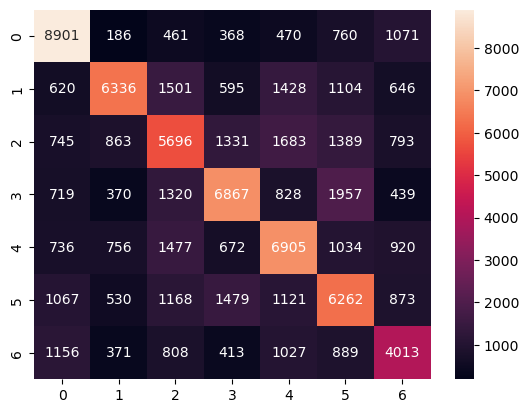

(array([3, 5, 1, ..., 6, 2, 2]), 0.5411192916606515)

In [53]:
hist = HistGradientBoostingClassifier( random_state=42,verbose=1,learning_rate=.01,scoring='f1_micro',n_iter_no_change=20,validation_fraction=.2,max_iter=1000,l2_regularization=.8,max_leaf_nodes=50)
predect(hist,X_train3s, y_train3,X_test3s, y_test3)

In [ ]:
ensemble_clf=[hist, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        predect(ensemble_clf[i],X_train3s, y_train3,X_test3s, y_test3)

In [56]:
extra_trees_model = ExtraTreesClassifier(n_estimators=1000)
rf_model = RandomForestClassifier( n_jobs=-1) 

Training Accuracy :	  0.9999959898945342
Testing Accuracy :	   0.5967349983157693
0.5967349983157693
classification report:
                precision    recall  f1-score   support

           0       0.64      0.78      0.71     12217
           1       0.83      0.53      0.65     12230
           2       0.55      0.50      0.52     12500
           3       0.67      0.59      0.63     12500
           4       0.55      0.62      0.59     12500
           5       0.50      0.65      0.56     12500
           6       0.53      0.46      0.49      8677

    accuracy                           0.60     83124
   macro avg       0.61      0.59      0.59     83124
weighted avg       0.61      0.60      0.60     83124



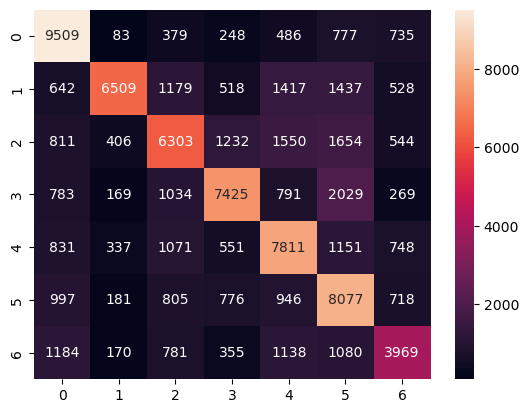

(array([3, 0, 1, ..., 6, 2, 5]), 0.5967349983157693)

In [57]:
predect(extra_trees_model,X_train3, y_train3,X_test3, y_test3)

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.9481905753709972
Testing Accuracy :	   0.6497969384567323
0.6497969384567323
classification report:
                precision    recall  f1-score   support

           0       0.67      0.76      0.71      1096
           1       0.78      0.77      0.77       996
           2       0.51      0.46      0.48       863
           3       0.65      0.61      0.63       818
           4       0.63      0.63      0.63       858
           5       0.68      0.67      0.68       849
           6       0.60      0.61      0.60       922

    accuracy                           0.65      6402
   macro avg       0.64      0.64      0.64      6402
weighted avg       0.65      0.65      0.65      6402



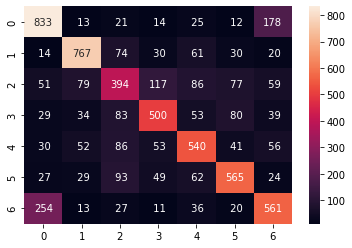

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.4526710402999063
0.4526710402999063
classification report:
                precision    recall  f1-score   support

           0       0.50      0.50      0.50      1096
           1       0.54      0.58      0.56       996
           2       0.32      0.30      0.31       863
           3       0.43      0.42      0.42       818
           4       0.43      0.43      0.43       858
           5       0.49      0.50      0.49       849
           6       0.42      0.41      0.41       922

    accuracy                           0.45      6402
   macro avg       0.45      0.45      0.45      6402
weighted avg       0.45      0.45      0.45      6402



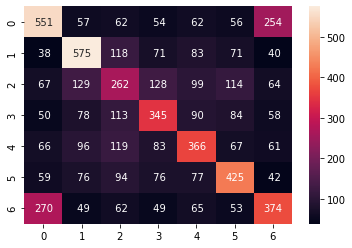

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.6527647610121837
0.6527647610121837
classification report:
                precision    recall  f1-score   support

           0       0.62      0.73      0.67      1096
           1       0.79      0.81      0.80       996
           2       0.52      0.42      0.46       863
           3       0.71      0.67      0.69       818
           4       0.63      0.63      0.63       858
           5       0.74      0.72      0.73       849
           6       0.56      0.55      0.55       922

    accuracy                           0.65      6402
   macro avg       0.65      0.65      0.65      6402
weighted avg       0.65      0.65      0.65      6402



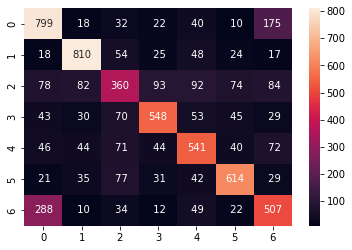

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.37568341577714137
Testing Accuracy :	   0.3642611683848797
0.3642611683848797
classification report:
                precision    recall  f1-score   support

           0       0.46      0.55      0.50      1096
           1       0.33      0.48      0.39       996
           2       0.25      0.20      0.22       863
           3       0.27      0.13      0.17       818
           4       0.34      0.31      0.32       858
           5       0.41      0.33      0.36       849
           6       0.39      0.48      0.43       922

    accuracy                           0.36      6402
   macro avg       0.35      0.35      0.34      6402
weighted avg       0.35      0.36      0.35      6402



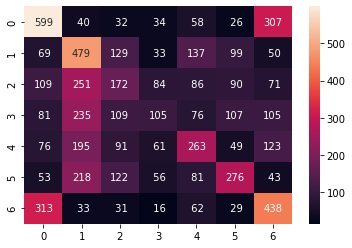

#############################BaggingClassifier#############################
Training Accuracy :	  0.9927623014839886
Testing Accuracy :	   0.5659169009684474
0.5659169009684474
classification report:
                precision    recall  f1-score   support

           0       0.57      0.70      0.63      1096
           1       0.62      0.75      0.68       996
           2       0.39      0.35      0.37       863
           3       0.59      0.56      0.57       818
           4       0.56      0.52      0.54       858
           5       0.67      0.59      0.63       849
           6       0.54      0.44      0.48       922

    accuracy                           0.57      6402
   macro avg       0.56      0.56      0.56      6402
weighted avg       0.56      0.57      0.56      6402



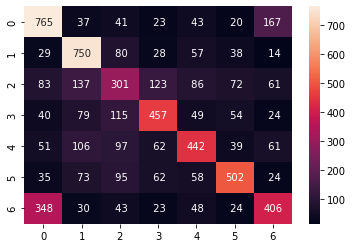

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.5960637300843487
0.5960637300843487
classification report:
                precision    recall  f1-score   support

           0       0.55      0.72      0.62      1096
           1       0.72      0.75      0.74       996
           2       0.42      0.37      0.39       863
           3       0.69      0.61      0.64       818
           4       0.60      0.60      0.60       858
           5       0.69      0.64      0.66       849
           6       0.51      0.45      0.48       922

    accuracy                           0.60      6402
   macro avg       0.60      0.59      0.59      6402
weighted avg       0.60      0.60      0.59      6402



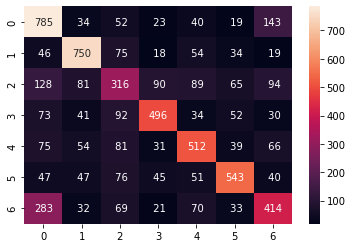

In [18]:
ensemble_clf=[hist, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        predect(ensemble_clf[i],X_train3, y_train3,X_test3, y_test3)

In [19]:
ensemble_clf=[model, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        predect(ensemble_clf[i],X_train3, y_train3,X_test3, y_test3)

#############################atuoencoder#############################


AttributeError: 'atuoencoder' object has no attribute 'fit'

In [ ]:
meanvar_new=pd.concat([meanvar_X,meanvar_lfcc],axis=1)
new_y=pd.concat([pd.DataFrame(Y),pd.DataFrame(Y2)],axis=0)


In [ ]:
y3=le.fit_transform(Y2)

X_train4, X_test4, y_train4, y_test4 = train_test_split(meanvar_new, y3,
                                            stratify=y3, 
                                            test_size=0.25)

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.9695391825045561
Testing Accuracy :	   0.7058731646360512
0.7058731646360512
classification report:
                precision    recall  f1-score   support

           0       0.76      0.85      0.80      1096
           1       0.80      0.82      0.81       996
           2       0.55      0.50      0.53       863
           3       0.65      0.63      0.64       818
           4       0.68      0.68      0.68       858
           5       0.72      0.63      0.67       849
           6       0.71      0.76      0.73       922

    accuracy                           0.71      6402
   macro avg       0.70      0.70      0.70      6402
weighted avg       0.70      0.71      0.70      6402



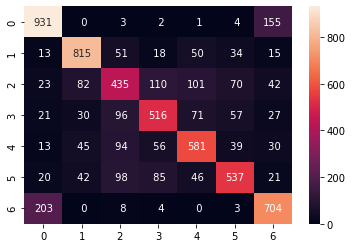

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.4879725085910653
0.4879725085910653
classification report:
                precision    recall  f1-score   support

           0       0.67      0.65      0.66      1096
           1       0.60      0.61      0.61       996
           2       0.29      0.29      0.29       863
           3       0.38      0.40      0.39       818
           4       0.43      0.43      0.43       858
           5       0.42      0.42      0.42       849
           6       0.56      0.54      0.55       922

    accuracy                           0.49      6402
   macro avg       0.48      0.48      0.48      6402
weighted avg       0.49      0.49      0.49      6402



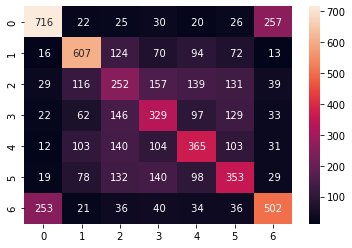

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.6102780381130897
0.6102780381130897
classification report:
                precision    recall  f1-score   support

           0       0.71      0.79      0.75      1096
           1       0.66      0.77      0.71       996
           2       0.44      0.38      0.41       863
           3       0.54      0.53      0.53       818
           4       0.61      0.51      0.55       858
           5       0.62      0.49      0.55       849
           6       0.60      0.71      0.65       922

    accuracy                           0.61      6402
   macro avg       0.60      0.60      0.59      6402
weighted avg       0.60      0.61      0.60      6402



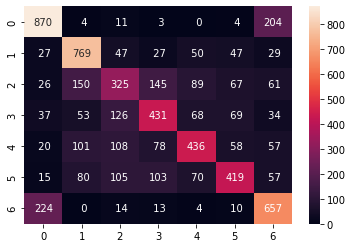

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.43280395730278576
Testing Accuracy :	   0.42752264917213373
0.42752264917213373
classification report:
                precision    recall  f1-score   support

           0       0.64      0.74      0.69      1096
           1       0.45      0.54      0.49       996
           2       0.29      0.24      0.26       863
           3       0.35      0.16      0.22       818
           4       0.23      0.09      0.13       858
           5       0.26      0.47      0.33       849
           6       0.59      0.62      0.60       922

    accuracy                           0.43      6402
   macro avg       0.40      0.41      0.39      6402
weighted avg       0.41      0.43      0.41      6402



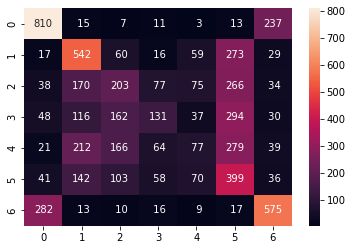

#############################BaggingClassifier#############################
Training Accuracy :	  0.991304347826087
Testing Accuracy :	   0.5887222742892846
0.5887222742892846
classification report:
                precision    recall  f1-score   support

           0       0.68      0.81      0.74      1096
           1       0.66      0.74      0.70       996
           2       0.35      0.38      0.37       863
           3       0.51      0.47      0.49       818
           4       0.60      0.47      0.53       858
           5       0.61      0.49      0.54       849
           6       0.65      0.66      0.65       922

    accuracy                           0.59      6402
   macro avg       0.58      0.57      0.57      6402
weighted avg       0.59      0.59      0.58      6402



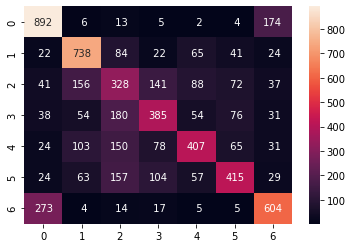

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.6073102155576382
0.6073102155576382
classification report:
                precision    recall  f1-score   support

           0       0.72      0.79      0.75      1096
           1       0.64      0.79      0.71       996
           2       0.48      0.37      0.42       863
           3       0.54      0.55      0.54       818
           4       0.62      0.51      0.56       858
           5       0.62      0.50      0.55       849
           6       0.56      0.66      0.61       922

    accuracy                           0.61      6402
   macro avg       0.60      0.60      0.59      6402
weighted avg       0.60      0.61      0.60      6402



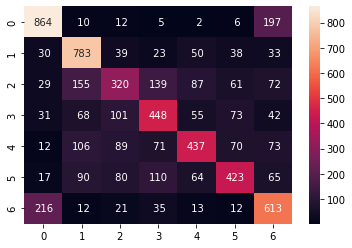

In [ ]:
ensemble_clf=[model, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        predect(ensemble_clf[i],X_train4, y_train4,X_test4, y_test4)

In [ ]:
faltten_X.shape

(25607, 8333)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(meanvar_X, y,
                                            stratify=y, 
                                            test_size=0.25)
                                            

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(meanvar_X2, y,
                                            stratify=y, 
                                            test_size=0.25)

In [ ]:
y_train1[0]

5

In [ ]:
ExtraTreesClassifier(n_estimators: int = 100, *, criterion: str = "gini", max_depth: Any | 
None = None, min_samples_split: int = 2, min_samples_leaf: int = 1, 
min_weight_fraction_leaf: float = 0, max_features: str = "auto", max_leaf_nodes: Any |
 None = None, min_impurity_decrease: float = 0, min_impurity_split: Any | 
 None = None, bootstrap: bool = False, oob_score: bool = False, n_jobs: Any |
  None = None, random_state: Any | None = None, verbose: int = 0, warm_start: bool = False, class_weight: Any |
 None = None, ccp_alpha: float = 0, max_samples: Any | None = None)

In [ ]:
extra_trees_model = ExtraTreesClassifier(n_estimators=500,random_state=42)


In [ ]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier
results = model_selection.cross_val_score(extra_trees_model, meanvar_X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std()))



Accuracy: 0.74 (+/- 0.05)


#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.925436084353033
Testing Accuracy :	   0.6579194001874414
0.6579194001874414
classification report:
                precision    recall  f1-score   support

           0       0.68      0.77      0.72      1096
           1       0.75      0.80      0.77       996
           2       0.54      0.45      0.49       863
           3       0.64      0.62      0.63       818
           4       0.65      0.66      0.66       858
           5       0.71      0.63      0.66       849
           6       0.60      0.62      0.61       922

    accuracy                           0.66      6402
   macro avg       0.65      0.65      0.65      6402
weighted avg       0.65      0.66      0.65      6402



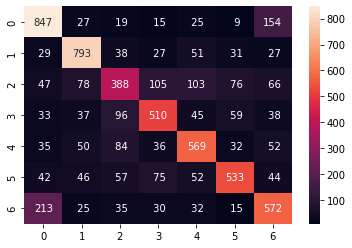

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.46485473289597
0.46485473289597
classification report:
                precision    recall  f1-score   support

           0       0.54      0.54      0.54      1096
           1       0.61      0.61      0.61       996
           2       0.28      0.28      0.28       863
           3       0.43      0.43      0.43       818
           4       0.46      0.45      0.45       858
           5       0.44      0.47      0.46       849
           6       0.44      0.43      0.44       922

    accuracy                           0.46      6402
   macro avg       0.46      0.46      0.46      6402
weighted avg       0.47      0.46      0.46      6402



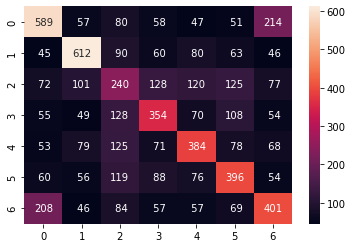

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.6925960637300843
0.6925960637300843
classification report:
                precision    recall  f1-score   support

           0       0.64      0.80      0.71      1096
           1       0.78      0.86      0.82       996
           2       0.58      0.44      0.50       863
           3       0.72      0.68      0.70       818
           4       0.71      0.70      0.71       858
           5       0.80      0.68      0.73       849
           6       0.63      0.62      0.63       922

    accuracy                           0.69      6402
   macro avg       0.69      0.69      0.69      6402
weighted avg       0.69      0.69      0.69      6402



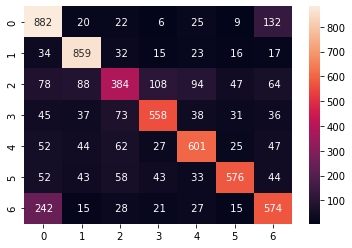

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.42426451444936214
Testing Accuracy :	   0.41596376132458607
0.41596376132458607
classification report:
                precision    recall  f1-score   support

           0       0.48      0.58      0.53      1096
           1       0.40      0.55      0.46       996
           2       0.33      0.21      0.26       863
           3       0.35      0.29      0.32       818
           4       0.42      0.35      0.38       858
           5       0.41      0.37      0.39       849
           6       0.46      0.46      0.46       922

    accuracy                           0.42      6402
   macro avg       0.41      0.40      0.40      6402
weighted avg       0.41      0.42      0.41      6402



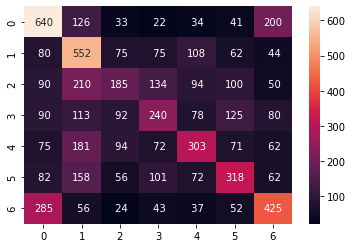

#############################BaggingClassifier#############################
Training Accuracy :	  0.9920853944285343
Testing Accuracy :	   0.5918462980318651
0.5918462980318651
classification report:
                precision    recall  f1-score   support

           0       0.58      0.72      0.64      1096
           1       0.68      0.77      0.72       996
           2       0.42      0.40      0.41       863
           3       0.57      0.54      0.55       818
           4       0.63      0.57      0.60       858
           5       0.66      0.55      0.60       849
           6       0.58      0.53      0.55       922

    accuracy                           0.59      6402
   macro avg       0.59      0.58      0.58      6402
weighted avg       0.59      0.59      0.59      6402



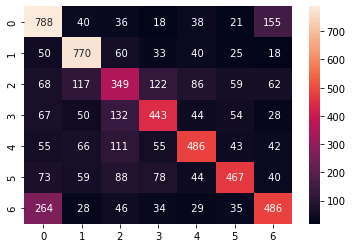

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.7386754139331458
0.7386754139331458
classification report:
                precision    recall  f1-score   support

           0       0.67      0.83      0.74      1096
           1       0.82      0.90      0.85       996
           2       0.70      0.50      0.58       863
           3       0.77      0.74      0.76       818
           4       0.77      0.76      0.77       858
           5       0.86      0.73      0.79       849
           6       0.63      0.66      0.65       922

    accuracy                           0.74      6402
   macro avg       0.75      0.73      0.73      6402
weighted avg       0.74      0.74      0.74      6402



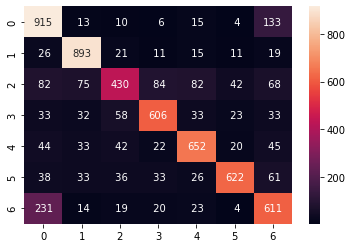

In [ ]:
ensemble_clf=[model, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        predect(ensemble_clf[i],X_train, y_train,X_test, y_test)

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.32668575891694873
Testing Accuracy :	   0.2478912839737582
0.2478912839737582
classification report:
                precision    recall  f1-score   support

           0       0.32      0.59      0.41      1096
           1       0.21      0.17      0.19       996
           2       0.17      0.08      0.11       863
           3       0.20      0.14      0.17       818
           4       0.18      0.13      0.15       858
           5       0.28      0.23      0.25       849
           6       0.22      0.31      0.26       922

    accuracy                           0.25      6402
   macro avg       0.23      0.23      0.22      6402
weighted avg       0.23      0.25      0.23      6402



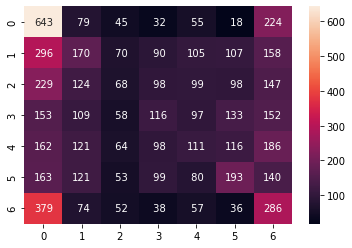

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.18181818181818182
0.18181818181818182
classification report:
                precision    recall  f1-score   support

           0       0.27      0.25      0.26      1096
           1       0.17      0.17      0.17       996
           2       0.15      0.15      0.15       863
           3       0.15      0.16      0.16       818
           4       0.17      0.16      0.16       858
           5       0.17      0.17      0.17       849
           6       0.18      0.19      0.18       922

    accuracy                           0.18      6402
   macro avg       0.18      0.18      0.18      6402
weighted avg       0.18      0.18      0.18      6402



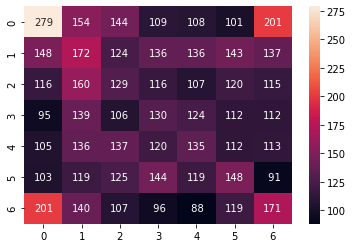

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.20134333020930958
0.20134333020930958
classification report:
                precision    recall  f1-score   support

           0       0.29      0.35      0.32      1096
           1       0.19      0.20      0.19       996
           2       0.13      0.12      0.13       863
           3       0.17      0.15      0.16       818
           4       0.15      0.14      0.14       858
           5       0.21      0.20      0.21       849
           6       0.21      0.21      0.21       922

    accuracy                           0.20      6402
   macro avg       0.19      0.20      0.19      6402
weighted avg       0.20      0.20      0.20      6402



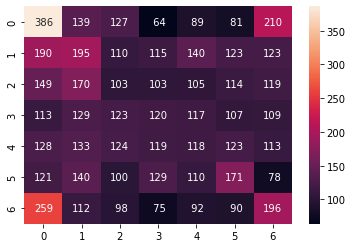

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.25956782087997915
Testing Accuracy :	   0.25476413620743515
0.25476413620743515
classification report:
                precision    recall  f1-score   support

           0       0.33      0.60      0.42      1096
           1       0.22      0.19      0.20       996
           2       0.26      0.06      0.09       863
           3       0.23      0.07      0.11       818
           4       0.18      0.23      0.20       858
           5       0.25      0.26      0.25       849
           6       0.24      0.29      0.26       922

    accuracy                           0.25      6402
   macro avg       0.24      0.24      0.22      6402
weighted avg       0.25      0.25      0.23      6402



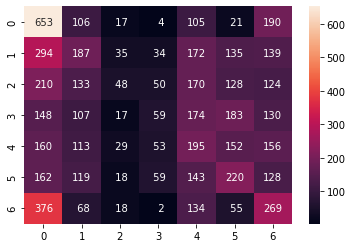

#############################BaggingClassifier#############################
Training Accuracy :	  0.9722468107263733
Testing Accuracy :	   0.19165885660731022
0.19165885660731022
classification report:
                precision    recall  f1-score   support

           0       0.27      0.35      0.30      1096
           1       0.18      0.20      0.19       996
           2       0.14      0.14      0.14       863
           3       0.17      0.15      0.16       818
           4       0.15      0.13      0.14       858
           5       0.19      0.16      0.18       849
           6       0.19      0.16      0.17       922

    accuracy                           0.19      6402
   macro avg       0.18      0.19      0.18      6402
weighted avg       0.19      0.19      0.19      6402



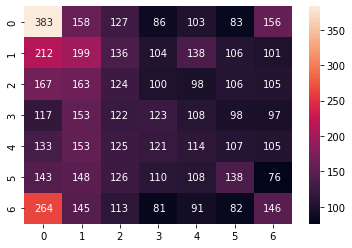

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.2000937207122774
0.2000937207122774
classification report:
                precision    recall  f1-score   support

           0       0.28      0.34      0.31      1096
           1       0.18      0.19      0.19       996
           2       0.13      0.12      0.12       863
           3       0.17      0.15      0.16       818
           4       0.17      0.15      0.16       858
           5       0.21      0.20      0.21       849
           6       0.20      0.21      0.21       922

    accuracy                           0.20      6402
   macro avg       0.19      0.19      0.19      6402
weighted avg       0.20      0.20      0.20      6402



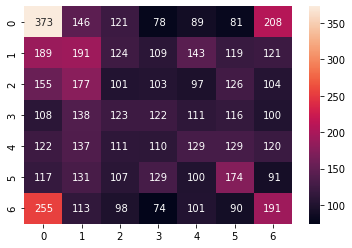

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.4736787294975267
Testing Accuracy :	   0.35129646985317087
0.35129646985317087
classification report:
                precision    recall  f1-score   support

           0       0.50      0.61      0.55      1096
           1       0.40      0.50      0.44       996
           2       0.26      0.14      0.18       863
           3       0.30      0.25      0.27       818
           4       0.22      0.18      0.20       858
           5       0.32      0.28      0.30       849
           6       0.30      0.40      0.34       922

    accuracy                           0.35      6402
   macro avg       0.33      0.34      0.33      6402
weighted avg       0.34      0.35      0.34      6402



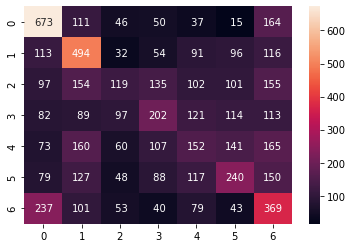

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.2611683848797251
0.2611683848797251
classification report:
                precision    recall  f1-score   support

           0       0.44      0.44      0.44      1096
           1       0.30      0.31      0.30       996
           2       0.17      0.16      0.17       863
           3       0.20      0.20      0.20       818
           4       0.19      0.20      0.19       858
           5       0.24      0.23      0.24       849
           6       0.23      0.22      0.22       922

    accuracy                           0.26      6402
   macro avg       0.25      0.25      0.25      6402
weighted avg       0.26      0.26      0.26      6402



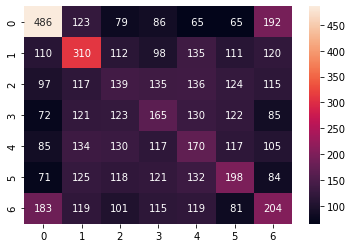

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.338019368947204
0.338019368947204
classification report:
                precision    recall  f1-score   support

           0       0.50      0.59      0.54      1096
           1       0.39      0.47      0.43       996
           2       0.21      0.15      0.17       863
           3       0.28      0.26      0.27       818
           4       0.22      0.20      0.21       858
           5       0.31      0.27      0.29       849
           6       0.30      0.33      0.32       922

    accuracy                           0.34      6402
   macro avg       0.32      0.32      0.32      6402
weighted avg       0.32      0.34      0.33      6402



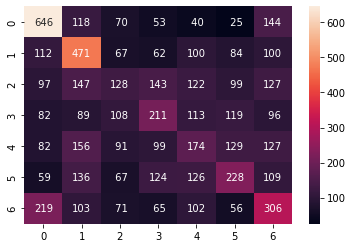

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.33866180682114033
Testing Accuracy :	   0.33552014995313967
0.33552014995313967
classification report:
                precision    recall  f1-score   support

           0       0.46      0.61      0.53      1096
           1       0.37      0.47      0.41       996
           2       0.26      0.16      0.20       863
           3       0.28      0.22      0.25       818
           4       0.23      0.17      0.20       858
           5       0.30      0.26      0.28       849
           6       0.29      0.36      0.32       922

    accuracy                           0.34      6402
   macro avg       0.31      0.32      0.31      6402
weighted avg       0.32      0.34      0.32      6402



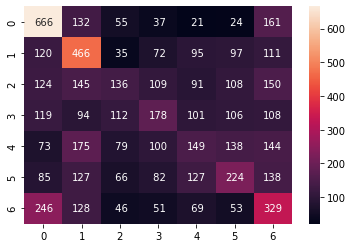

#############################BaggingClassifier#############################
Training Accuracy :	  0.9818276490497266
Testing Accuracy :	   0.3083411433926898
0.3083411433926898
classification report:
                precision    recall  f1-score   support

           0       0.46      0.58      0.51      1096
           1       0.36      0.44      0.39       996
           2       0.22      0.21      0.21       863
           3       0.24      0.22      0.23       818
           4       0.18      0.16      0.17       858
           5       0.27      0.23      0.25       849
           6       0.28      0.23      0.25       922

    accuracy                           0.31      6402
   macro avg       0.29      0.29      0.29      6402
weighted avg       0.29      0.31      0.30      6402



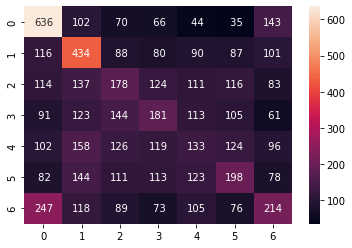

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.3414557950640425
0.3414557950640425
classification report:
                precision    recall  f1-score   support

           0       0.51      0.59      0.55      1096
           1       0.39      0.47      0.42       996
           2       0.24      0.17      0.20       863
           3       0.28      0.26      0.27       818
           4       0.23      0.20      0.22       858
           5       0.30      0.29      0.29       849
           6       0.29      0.32      0.31       922

    accuracy                           0.34      6402
   macro avg       0.32      0.33      0.32      6402
weighted avg       0.33      0.34      0.33      6402



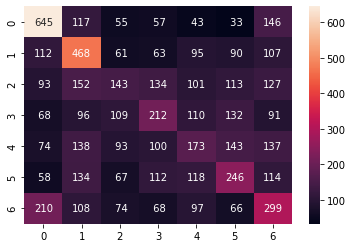

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.6418120281176777
Testing Accuracy :	   0.4136207435176507
0.4136207435176507
classification report:
                precision    recall  f1-score   support

           0       0.57      0.64      0.60      1096
           1       0.44      0.53      0.48       996
           2       0.28      0.22      0.24       863
           3       0.37      0.35      0.36       818
           4       0.38      0.30      0.33       858
           5       0.36      0.36      0.36       849
           6       0.38      0.42      0.40       922

    accuracy                           0.41      6402
   macro avg       0.40      0.40      0.40      6402
weighted avg       0.40      0.41      0.41      6402



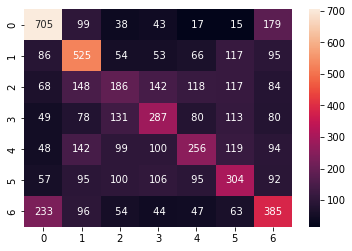

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.3063105279600125
0.3063105279600125
classification report:
                precision    recall  f1-score   support

           0       0.47      0.48      0.48      1096
           1       0.38      0.38      0.38       996
           2       0.20      0.21      0.21       863
           3       0.25      0.24      0.24       818
           4       0.28      0.26      0.27       858
           5       0.27      0.28      0.27       849
           6       0.24      0.23      0.24       922

    accuracy                           0.31      6402
   macro avg       0.30      0.30      0.30      6402
weighted avg       0.31      0.31      0.31      6402



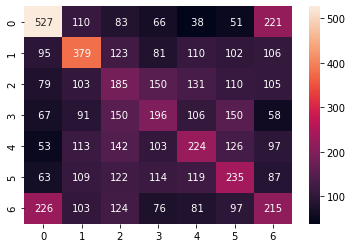

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.41815057794439237
0.41815057794439237
classification report:
                precision    recall  f1-score   support

           0       0.57      0.65      0.61      1096
           1       0.45      0.56      0.50       996
           2       0.27      0.23      0.25       863
           3       0.37      0.34      0.35       818
           4       0.40      0.31      0.35       858
           5       0.36      0.32      0.34       849
           6       0.38      0.42      0.40       922

    accuracy                           0.42      6402
   macro avg       0.40      0.41      0.40      6402
weighted avg       0.41      0.42      0.41      6402



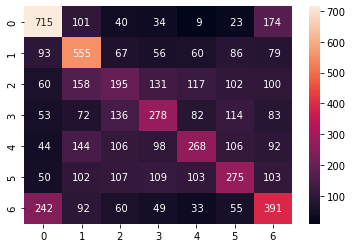

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.3649570424368654
Testing Accuracy :	   0.3508278662917838
0.3508278662917838
classification report:
                precision    recall  f1-score   support

           0       0.49      0.62      0.55      1096
           1       0.35      0.41      0.38       996
           2       0.26      0.20      0.23       863
           3       0.29      0.24      0.26       818
           4       0.34      0.24      0.28       858
           5       0.29      0.30      0.30       849
           6       0.32      0.36      0.34       922

    accuracy                           0.35      6402
   macro avg       0.33      0.34      0.33      6402
weighted avg       0.34      0.35      0.34      6402



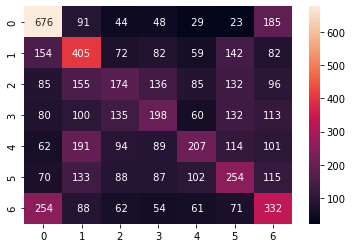

#############################BaggingClassifier#############################
Training Accuracy :	  0.9867742775318927
Testing Accuracy :	   0.3784754764136207
0.3784754764136207
classification report:
                precision    recall  f1-score   support

           0       0.51      0.64      0.57      1096
           1       0.41      0.52      0.46       996
           2       0.23      0.24      0.24       863
           3       0.32      0.30      0.31       818
           4       0.35      0.28      0.31       858
           5       0.34      0.28      0.30       849
           6       0.38      0.31      0.34       922

    accuracy                           0.38      6402
   macro avg       0.36      0.37      0.36      6402
weighted avg       0.37      0.38      0.37      6402



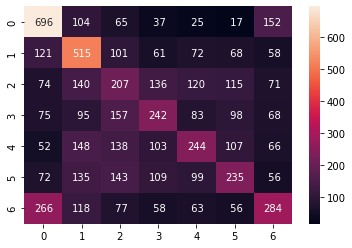

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.43689472039987504
0.43689472039987504
classification report:
                precision    recall  f1-score   support

           0       0.58      0.65      0.61      1096
           1       0.46      0.56      0.50       996
           2       0.30      0.23      0.26       863
           3       0.40      0.38      0.39       818
           4       0.43      0.33      0.37       858
           5       0.38      0.35      0.37       849
           6       0.41      0.47      0.44       922

    accuracy                           0.44      6402
   macro avg       0.42      0.42      0.42      6402
weighted avg       0.43      0.44      0.43      6402



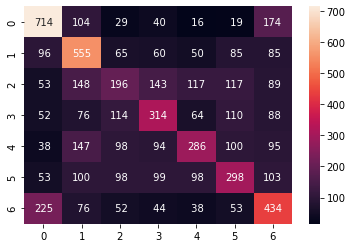

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.779067951054413
Testing Accuracy :	   0.4476726023117776
0.4476726023117776
classification report:
                precision    recall  f1-score   support

           0       0.60      0.66      0.63      1096
           1       0.48      0.58      0.52       996
           2       0.30      0.25      0.27       863
           3       0.40      0.37      0.38       818
           4       0.39      0.32      0.35       858
           5       0.40      0.38      0.39       849
           6       0.44      0.49      0.47       922

    accuracy                           0.45      6402
   macro avg       0.43      0.44      0.43      6402
weighted avg       0.44      0.45      0.44      6402



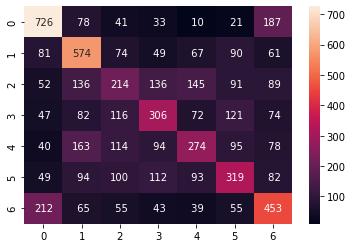

#############################DecisionTreeClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.30896594814120587
0.30896594814120587
classification report:
                precision    recall  f1-score   support

           0       0.48      0.48      0.48      1096
           1       0.35      0.35      0.35       996
           2       0.20      0.22      0.21       863
           3       0.24      0.24      0.24       818
           4       0.26      0.27      0.27       858
           5       0.29      0.27      0.28       849
           6       0.29      0.27      0.28       922

    accuracy                           0.31      6402
   macro avg       0.30      0.30      0.30      6402
weighted avg       0.31      0.31      0.31      6402



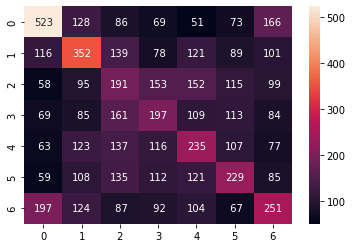

#############################RandomForestClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.4442361761949391
0.4442361761949391
classification report:
                precision    recall  f1-score   support

           0       0.59      0.66      0.62      1096
           1       0.47      0.58      0.52       996
           2       0.31      0.24      0.27       863
           3       0.41      0.39      0.40       818
           4       0.41      0.32      0.36       858
           5       0.39      0.36      0.37       849
           6       0.41      0.48      0.44       922

    accuracy                           0.44      6402
   macro avg       0.43      0.43      0.43      6402
weighted avg       0.43      0.44      0.44      6402



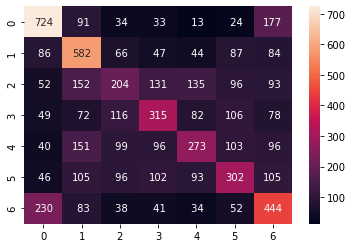

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.39208539442853424
Testing Accuracy :	   0.3744142455482662
0.3744142455482662
classification report:
                precision    recall  f1-score   support

           0       0.53      0.61      0.57      1096
           1       0.40      0.46      0.42       996
           2       0.25      0.19      0.22       863
           3       0.30      0.29      0.30       818
           4       0.35      0.26      0.30       858
           5       0.31      0.30      0.31       849
           6       0.36      0.43      0.39       922

    accuracy                           0.37      6402
   macro avg       0.36      0.36      0.36      6402
weighted avg       0.37      0.37      0.37      6402



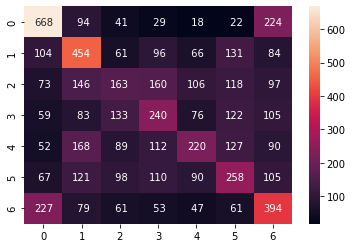

#############################BaggingClassifier#############################
Training Accuracy :	  0.9881801614162978
Testing Accuracy :	   0.38222430490471726
0.38222430490471726
classification report:
                precision    recall  f1-score   support

           0       0.51      0.64      0.57      1096
           1       0.43      0.51      0.47       996
           2       0.24      0.25      0.24       863
           3       0.33      0.33      0.33       818
           4       0.35      0.29      0.32       858
           5       0.32      0.25      0.28       849
           6       0.37      0.31      0.34       922

    accuracy                           0.38      6402
   macro avg       0.37      0.37      0.36      6402
weighted avg       0.37      0.38      0.37      6402



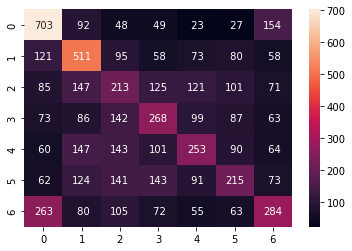

#############################ExtraTreesClassifier#############################
Training Accuracy :	  1.0
Testing Accuracy :	   0.4734457981880662
0.4734457981880662
classification report:
                precision    recall  f1-score   support

           0       0.60      0.70      0.65      1096
           1       0.48      0.62      0.54       996
           2       0.38      0.24      0.29       863
           3       0.45      0.43      0.44       818
           4       0.45      0.33      0.38       858
           5       0.43      0.40      0.41       849
           6       0.42      0.52      0.47       922

    accuracy                           0.47      6402
   macro avg       0.46      0.46      0.45      6402
weighted avg       0.46      0.47      0.46      6402



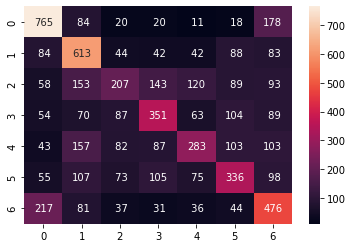

In [ ]:
accs=[]
listy=[]
arg=[2,5,10,20,30,40]
for n in arg:
    pca = PCA(n_components=n)
    trainpca=pca.fit_transform(X_train4)
    testpca=pca.transform(X_test4)
    ensemble_clf=[model, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
    for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        ypred,acc=predect(ensemble_clf[i],trainpca, y_train4,testpca, y_test4)
        listy.append(ypred)
        accs.append(acc)

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


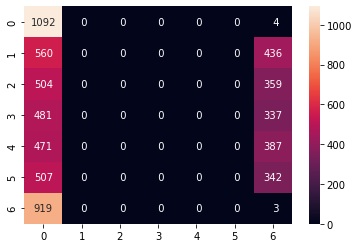

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


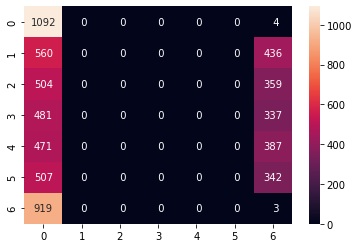

#############################DecisionTreeClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


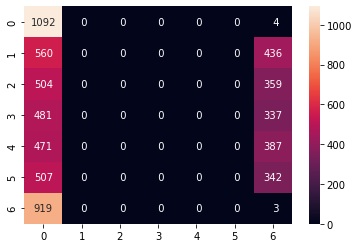

#############################RandomForestClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


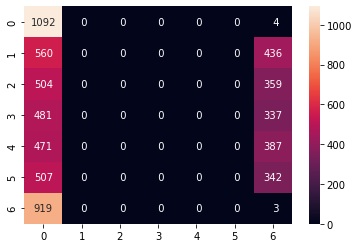

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


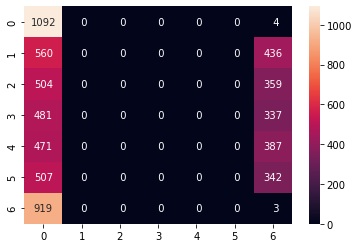

#############################BaggingClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


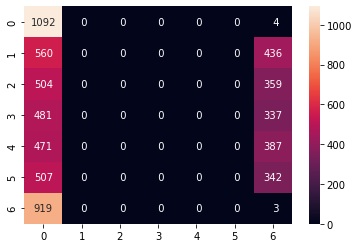

#############################ExtraTreesClassifier#############################
Training Accuracy :	  0.17104920593595418
Testing Accuracy :	   0.17104029990627928
0.17104029990627928
classification report:
                precision    recall  f1-score   support

           0       0.24      1.00      0.39      1096
           1       0.00      0.00      0.00       996
           2       0.00      0.00      0.00       863
           3       0.00      0.00      0.00       818
           4       0.00      0.00      0.00       858
           5       0.00      0.00      0.00       849
           6       0.00      0.00      0.00       922

    accuracy                           0.17      6402
   macro avg       0.03      0.14      0.06      6402
weighted avg       0.04      0.17      0.07      6402



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


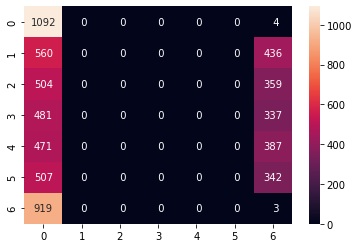

In [ ]:
ensemble_clf=[model,model, dt_model, rf_model, ada_boost_model, 
           bagging_model,extra_trees_model,]
for i in range(len(ensemble_clf)):
    # Initialising model
        print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
        predect(model,X_train1, y_train1,X_test1, y_test1)

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



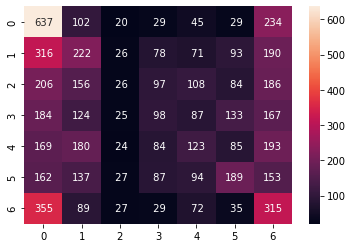

#############################HistGradientBoostingClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



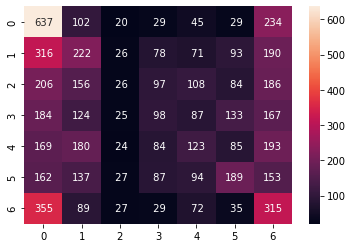

#############################DecisionTreeClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



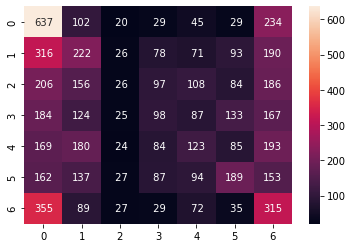

#############################RandomForestClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



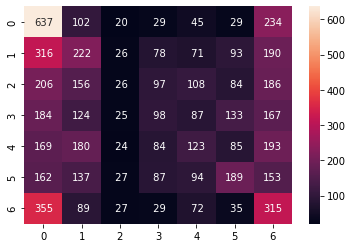

#############################AdaBoostClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



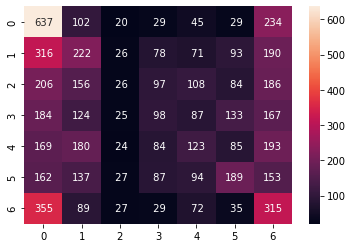

#############################BaggingClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



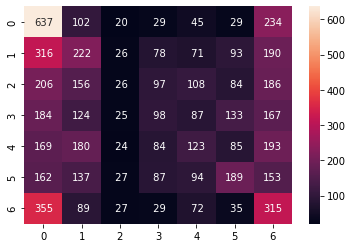

#############################ExtraTreesClassifier#############################
Training Accuracy :	  0.30101536058318146
Testing Accuracy :	   0.25148391127772574
0.25148391127772574
classification report:
                precision    recall  f1-score   support

           0       0.31      0.58      0.41      1096
           1       0.22      0.22      0.22       996
           2       0.15      0.03      0.05       863
           3       0.20      0.12      0.15       818
           4       0.20      0.14      0.17       858
           5       0.29      0.22      0.25       849
           6       0.22      0.34      0.27       922

    accuracy                           0.25      6402
   macro avg       0.23      0.24      0.22      6402
weighted avg       0.23      0.25      0.22      6402



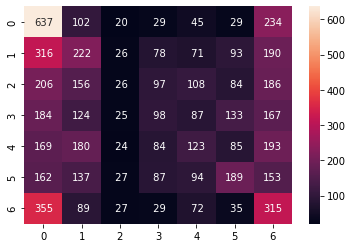

KeyboardInterrupt: 

In [ ]:
# accs=[]
# listy=[]
# arg=[2,20,30]
# for n in arg:
#     pca = PCA(n_components=n)
#     X_train2=pca.fit_transform(X_train1)
#     X_test2=pca.transform(X_test1)
#     ensemble_clf=[model,model, dt_model, rf_model, ada_boost_model, 
#            bagging_model,extra_trees_model,]
#     for i in range(len(ensemble_clf)):
#     # Initialising model
#         print('#############################'+str(type(ensemble_clf[i]).__name__)+'#############################')
#         ypred,acc=predect(model,X_train2, y_train1,X_test2, y_test1)
#         listy.append(ypred)
#         accs.append(acc)
    
    

In [ ]:
HistGradientBoostingClassifier(loss: str = 'auto',
 *, learning_rate: float = 0.1, max_iter: int = 100, max_leaf_nodes: int = 31, max_depth: Any
  | None = None, min_samples_leaf: int = 20, l2_regularization: float = 0, max_bins: int = 255, 
  categorical_features: Any | None = None, monotonic_cst: Any | None = None, warm_start: bool = False,
   early_stopping: str = 'auto', scoring: str = 'loss', validation_fraction: float = 0.1, n_iter_no_change: int = 10, 
   tol: float = 1e-7, verbose: int = 0, random_state: Any | None = None)

SyntaxError: invalid syntax (Temp/ipykernel_7432/3082846552.py, line 1)

In [ ]:
from sklearn.decomposition import PCA
list=[]
accs=[]
arg=[2,10,50,100,200,300,400,500,600,700,800,900,1000,1500]
for n in arg:
    pca = PCA(n_components=n)
    X_train1=pca.fit_transform(X_train)
    X_test1=pca.transform(X_test)
    model = RandomForestClassifier( n_jobs=-1,random_state=42,n_estimators= 5000,)
    ypred,acc=predect(model,X_train1, y_train,X_test1, y_test)
    list.append(ypred)
    accs.append(acc)



In [ ]:
accs
